# COGS 108 - Final Project

## Names
Guohua Xie
<br>Xincheng Shen
<br>Xinyan Chen
<br>Feiyi Hu


# 1. Overview
We did data cleaning to the two major datasets we chose and found the trend of the most popular game genre by data visualization. We also used Hypothesis Testing to explore the difference between Critic score and User score. Furthermore, we trained several models based on several aspects of the game such as name, developer, etc, to make predictions for the game sales and scores.

# 2. Research Question
**Can we predict a game’s popularity from its name, genre, platform, release year, developer, publisher and ratings?**

For “popularity of a game”, we define it by the game’s global sale, user score and critic score.

# 3. Background and Prior Work
### 3.1 Background
As the indispensable part of our everyday life, games have been acting as a more and more important role of entertainment. From HCG to RPG, from RTS to MOBA, different game genres vary in their popularity from time to time. We want first to search for several datasets of games, then analyze the data to figure out whether there are any correlations between the popular game and what are those correlations. For this topic, besides analyzing the historical data and finding a trend of popular games in different areas and periods of time, we hope our analysis can become a reference when the game developers need to plan for developing a game and hope to gain good sales and reputation.
 
### 3.2 Prior Work
Before starting our own analysis, we researched some analysis done by other researchers. In the first article, the writer found Japanese players had a special interest in Role Playing Games than any other region of the world [1]. In the second article, the author analyzed the age ratings of video games and found that the market share of Mature rated games (17+) has been increasing [2]. Also,over the last 20 years, there’s been a trend towards increase of global sales for “Shooter” genre video games. We also have information from some articles that players' love for a particular game platform can also affect game sales. To sum up, the factors affecting a game’s popularity cover all aspects. Although we know that the best way to experience a game is to try it out for ourselves, we still want to try to analyze possible correlations and trends from existing historical data.
 
### 3.3 References:
[1] Jones, Brent. “What Kind of Video Game does the World Like to Buy?” The Antares Alien, 12 Dec. 2018, www.antaresanalytics.net/post/2018/12/11/what-kind-of-video-game-does-the-world-like-to-buy.

[2] Alberch, Cristian. “Best SFW Videogames — and Yet Another Top 10 List.” Medium, 9 May 2019, medium.com/@cristian.alberch/best-sfw-videogames-and-yet-another-top-10-list-f8d62d3f6914.s/.




# 4. Hypothesis
We predict that game sales and ratings can be predicted by other factors of the game, such as game name, game genres, publisher, etc.

To keep the game rating consistent, we may run a hypothesis test to compare if the critic rating and user rating have a strong correlation. 

We believe a game's sale and rating is not only depend on its content, and here are some of the potential reasons:
- They can be affected to people's tastes of games. If most poeple favor action games, then this genre will be more popular.
- If the propaganda by the publishers of the games is good enough, more people will know it, and then buy it, maybe even with a higher rating.
- Poeple may have better impression of a game for some specific names.

To show this, we are going to train some models to help predict the game sales and ratings. Because the features of the game have different types, this step may involve different kinds of model training progress.

We expect to see some clear increse in the precision when we try to optimization our model compared to the baseline(whose prediction is simply the average), which indicates that correlation expected by our hypothesis.

# 5. Datasets
Our ideal dataset should include the most popular games. To define “popularity”, we believe it should contain the sales and the ratings of both professional critics and players. Thus, we expect our ideal dataset includes the top rating/ top seller of video games. Also, the genres, the release time, the developer of the game, the platform of the game... should be included. While we have more comprehensive data, we can try to find more reliable features that have correlations with the popularity of the game. Thus, we want to find datasets that have the more information about the game, the better.
 
Our chosen datasets are listed below.
 
**Dataset name:  Video Game Sales at 2016**
- Link to the dataset: https://www.kaggle.com/xtyscut/video-games-sales-as-at-22-dec-2016csv
- Variables: The game’s name, the platform of the games release, the year of the game's release, the genre of the game, the publisher of the game, the sales in North America, Europe, Japan and the rest of the world (in millions) and the total worldwide sales of each game, the scores of critics and users, the counts of critics and users, the developer of the game, the total rating of the game
- Number of observations: 16714
- Brief intro: This dataset includes video games with sales greater than 100,000 copies. The variables include the game’s name, the platform of the games release, the year of the game's release,the genre of the game, the publisher of the game, the sales in North America, Europe, Japan and the rest of the world (in millions) and the total worldwide sales of each game,  the scores of critics and users, the counts of critics and users, the developer of the game, the total rating of the game.
- The data is collected by a scrape of http://www.vgchartz.com/.
- The data will be stored as a csv file. 

**Dataset name:  Metacritic all games statistic**
- Link to the dataset: https://www.kaggle.com/skateddu/metacritic-all-time-games-stats
- Variables: Game name, game platform, game publisher, game genres, number of players(local and online), ESRB ratings, game release date, game page url, number of positive reviews by critic, number of neutral reviews by critic, number of negative reviews by critic, critic mean score, number of positive reviews by users, number of neutral reviews by users, number of negative reviews by users, users mean score and game additional info.
- Brief intro: this dataset includes all the Metacritic games statistics from 1995 to last year.
- Number of observations: 20423
- The data is collected by a scrape of https://www.metacritic.com/game
- The data will be stored as a csv file. It is also available in json format.



# 6. Setup

### 6.1 import

In [1]:
# basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import random
from random import sample
from collections import defaultdict

# model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# modeling tools
from sklearn.utils import shuffle
from sklearn import metrics

# download package
import nltk
_=nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 6.2 load dataset

In [2]:
ratings16 = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016.csv")

# a later version:
# https://www.kaggle.com/ashaheedq/video-games-sales-2019
ratings19 = pd.read_csv("data/vgs2019.csv")

# https://www.kaggle.com/skateddu/metacritic-all-time-games-stats
meta = pd.read_csv("data/metacritic_games.csv")

# https://www.kaggle.com/nikdavis/steam-store-games
steam = pd.read_csv("data/steam.csv")

# 7. Data Cleaning
Before moving onto the exploration, we want to clean the data first.

### 7.1 Browse the Data
We want to take a look at the data to know the details about them, like:
- What are the elements' data format?
- Are there any NaNs?
- Are there overlapping between the datasets?

In [3]:
ratings16.describe(include='all')[:4]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.0,16717,16665,16719.0,16719.0,16719.0,16719.0,16719.0,8137.0,8137.0,10015,7590.0,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991


In [4]:
meta.describe(include='all')[:4]

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
count,20422,20422,20385,20416,20422,13193,18131,324,20422,20422,20422.0,20422.0,20422.0,20422.0,20422.0,20422.0,20422.0,20422
unique,13246,19,4743,2234,68,53,8,11,4323,20413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91
top,Madden NFL 07,PC,Capcom,Ubisoft,Action,No Online Multiplayer,E,PlayStation VR Required,"Nov 14, 2006",/game/pc/star-wars-battlefront-ii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd
freq,10,5448,300,908,7113,3884,5921,75,56,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2597


#### Conclusion
The ratings19 dataset has the most games recored, but it has many fields missing (while ratings16 has those fields). 
<br>The steam dataset has only data of PC games, and the realase date on Steam may not be the actual release date of the game (rather, it's the release date on Steam). 
<br>The meta critic dataset is  doesn't provide sale data. 
<br>As thus, we will use the ratings16 dataset to be major dataset to analysis.

### 7.2 Remove/Rename columns

In [5]:
ratings16 = ratings16.rename(columns={'Year_of_Release':'Year'})
ratings16 = ratings16.drop(columns=['Critic_Count', 'User_Count'])
meta = meta.drop(columns = ['players', 'attribute', 'link', 'critic_positive', 'critic_neutral', 'critic_negative',
           'user_positive', 'user_neutral', 'user_negative'])
meta.columns = ['Name', 'Platform', 'Developer', 'Publisher', 'Genres', 'Rating', 'Date', 'Critic_Score', 'User_Score']

In [6]:
print(ratings16.columns)
print(meta.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Developer', 'Rating'],
      dtype='object')
Index(['Name', 'Platform', 'Developer', 'Publisher', 'Genres', 'Rating',
       'Date', 'Critic_Score', 'User_Score'],
      dtype='object')


### 7.3 Unify the data format of all datasets to make them consistant

In [7]:
# use uppercase for all texts
for label in ['Name', 'Platform', 'Publisher', 'Developer', 'Genre']:
    ratings16[label] = ratings16[label].apply(lambda s : s.upper() if type(s) is str else s)

for label in ['Name', 'Platform', 'Publisher', 'Developer', 'Genres']:
    meta[label] = meta[label].apply(lambda s : s.upper() if type(s) is str else s)

In [8]:
# split the release date of meta into year and month 
meta['Year'] = meta.Date.apply(lambda s : int(s.split()[2]) if type(s) is str else s )
meta['Month'] = meta.Date.apply(lambda s : s.split()[0].upper() if type(s) is str else s )
meta = meta.drop(columns=['Date'])

In [9]:
# if user score is 'tbd', change to NaN
ratings16['User_Score'] = ratings16['User_Score'].apply(lambda s : np.NaN if s in ['tbd', np.NaN] else float(s))
meta['User_Score'] = meta['User_Score'].apply(lambda s : np.NaN if s in ['tbd', np.NaN] else float(s))

In [10]:
print(ratings16.columns)
print(meta.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Developer', 'Rating'],
      dtype='object')
Index(['Name', 'Platform', 'Developer', 'Publisher', 'Genres', 'Rating',
       'Critic_Score', 'User_Score', 'Year', 'Month'],
      dtype='object')


### 7.4 Dataset merging
We spot that there are some missing data for ratings16 dataset.
<br>We want to try filling in the critic score and user score of the 16 dataset, from the metacritic dataset

In [11]:
# Select columns we need for merging data set
score = meta[['Name', 'Critic_Score', 'Year', 'User_Score', 'Platform', 'Publisher', 'Developer']]

# merge the ratings 16 with the metadata to fill NaN with real values
r16m = pd.merge(ratings16, score, 'left', on=['Name' ,'Platform', 'Publisher'])
r16m['Critic_Score'] = r16m['Critic_Score_x'].combine_first(r16m['Critic_Score_y'])
r16m['User_Score'] = r16m['User_Score_x'].combine_first(r16m['User_Score_y'])
r16m['Year'] = r16m['Year_x'].combine_first(r16m['Year_y'])
r16m['Developer'] = r16m['Developer_x'].combine_first(r16m['Developer_y'])

# Drop the extra columns
r16m = r16m.drop(columns = ['Critic_Score_y', 'User_Score_y', 'Year_y', 'Developer_y',
                            'Critic_Score_x', 'User_Score_x', 'Year_x', 'Developer_x',])

# cleanup
del score

In [12]:
# check to ensure successful merging
r16m.describe(include='all')[:2]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,User_Score,Year,Developer
count,16718,16720,16718,16666,16720.0,16720.0,16720.0,16720.0,16720.0,9951,8363.0,7885.0,16496.0,10316
unique,11562,31,12,581,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,1722


In [13]:
# check to ensure successful merging
ratings16.describe(include='all')[:2]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating
count,16717,16719,16450.0,16717,16665,16719.0,16719.0,16719.0,16719.0,16719.0,8137.0,7590.0,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1696,8


Notice that we've successfully added some of the missing Year, Developer, User Score, and Critic Score.
<br>Now use the merged dataset.

In [14]:
# replace the orginal with the mergred
ratings16 = r16m

Drop rows with out-of-scope values or critical NaN values¶

In [15]:
# drop rows with 'NaN' Names/Year 
ratings16 = ratings16.drop(index = ratings16.loc[r16m['Name'].isna()].index)
ratings16 = ratings16.drop(index = ratings16.loc[r16m['Year'].isna()].index)

# Check whether we mistakenly have some games that are released after 2016 and drop them if so
ratings16 = ratings16.drop(index = ratings16.loc[ratings16['Year'] > 2016].index)

# 8. Data Exploration
We want to somehow get some sense of our data by plotting some plots, and find some relationships across different variables. 

In [16]:
# Check the shape of our newly merged data set
print(ratings16.shape)
# Check the types of each column of our newly merged data set
print(ratings16.dtypes)

(16490, 14)
Name             object
Platform         object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Rating           object
Critic_Score    float64
User_Score      float64
Year            float64
Developer        object
dtype: object


### 8.1 Populairty trend for all game genres from 1980 - 2016
- We proceed by plotting the popularity trend of game genres from 1980 - 2016 based on each genre's sum of 'Global_Sales'

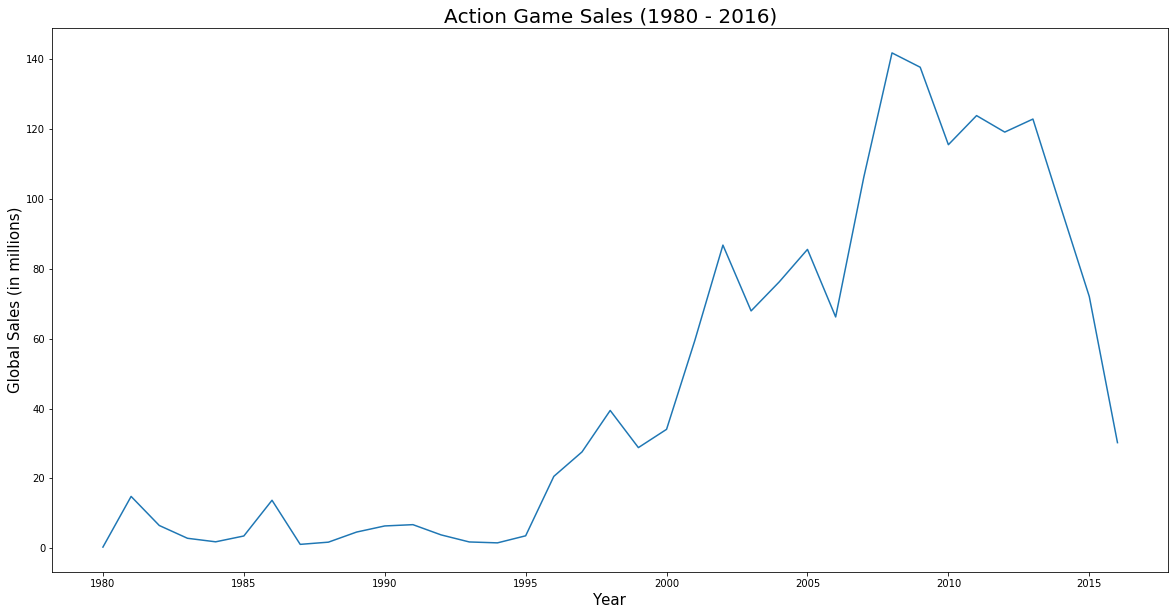

In [17]:
# Take out the data from three columns we need for plotting the popularity trending plot
ratings16_pop1 = ratings16[['Genre', 'Year', 'Global_Sales']].set_index('Year')

# Group by year and genre to sum them up
ratings16_pop1 = ratings16_pop1.groupby(['Genre', 'Year']).sum()

# Helper function used to plot a specific genre's trending plot
def plot_genre(genre):
    data = ratings16_pop1.loc[genre]
    plt.plot(data.index, data.values)

# Try plot one genre for testing
plt.figure(figsize = (20, 10))
plt.title('Action Game Sales (1980 - 2016)', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Global Sales (in millions)', fontsize = 15)
plot_genre('ACTION')

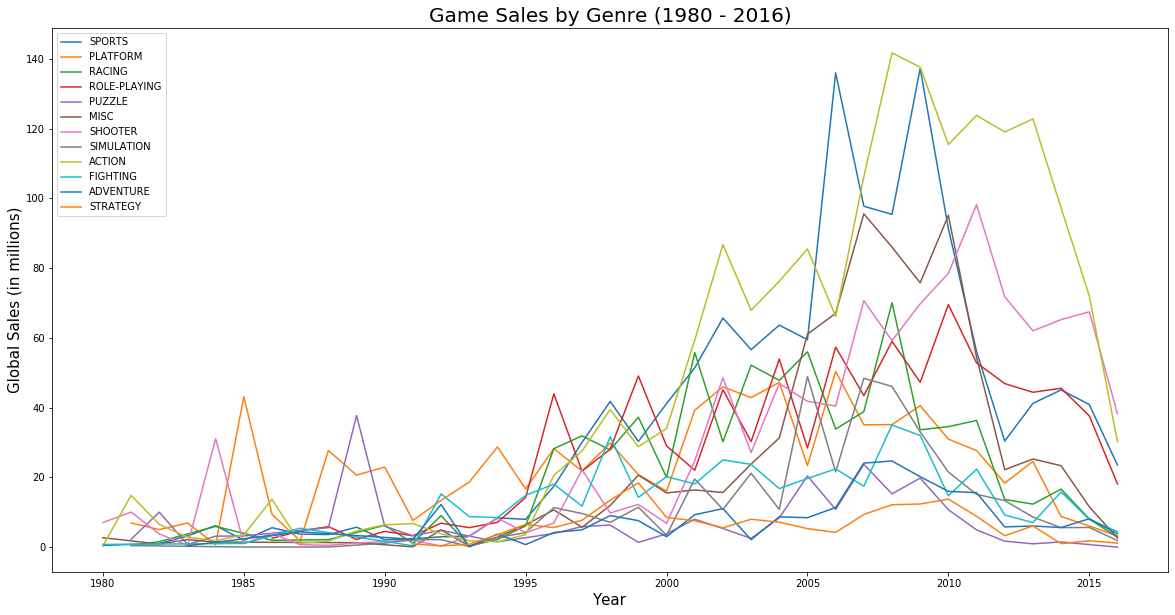

In [18]:
# Plot all genres for their popularity trends from 1980 - 2016 based on each genre's global sales

# Store all the unique genre types into genre_types
genre_types = ratings16['Genre'].unique()

# Adjust the figure size for clearer plot
plt.figure(figsize = (20, 10))

# Add title & labels
plt.title('Game Sales by Genre (1980 - 2016)', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Global Sales (in millions)', fontsize = 15)

# Generate plots
for genre in genre_types:
    plot_genre(genre)

_ = plt.legend(genre_types)

#### This plot is hard to read, so we try using horizontal stacked bar plot.

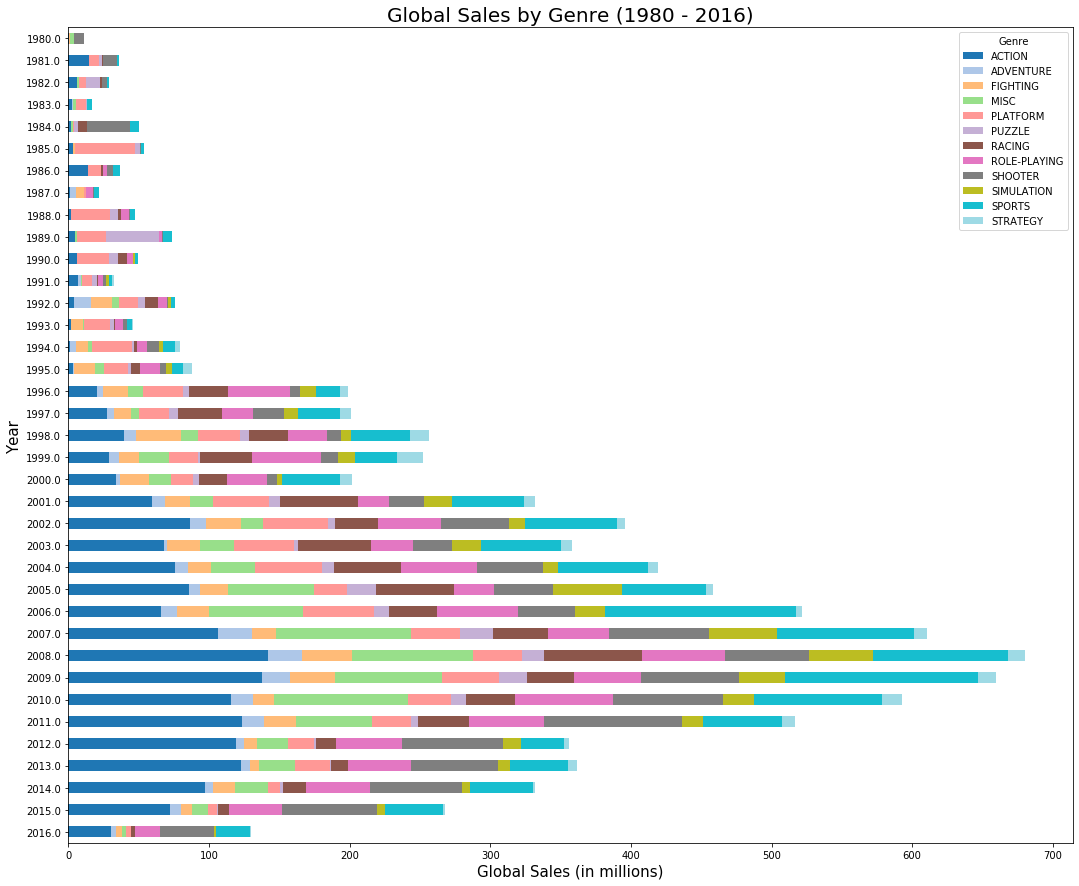

In [19]:
# Get the pivot table used for drawing horizontal stacked bar plot
pv_pop1 = pd.pivot_table(ratings16_pop1, values = 'Global_Sales', index = 'Year', columns = 'Genre')

# Sort the values by year
pv_pop1 = pv_pop1.sort_values(by = 'Year', ascending = False)

# Draw the horizontal bar plot & Set title & labels for the plot
plt_pop1 = pv_pop1.plot.barh(stacked = True, figsize = (18, 15), colormap = 'tab20')
plt_pop1.set_title("Global Sales by Genre (1980 - 2016)", fontsize = 20)
plt_pop1.set_xlabel("Global Sales (in millions)", fontsize = 15)
_ = plt_pop1.set_ylabel("Year", fontsize = 15)

#### Conclusion for 8.1
- Hopefully, the plot becomes easier to read, but still a little bit messy. 
- We can see certain trends for popular game genres from 1980 - 2016. 
    - In 1980s, the dominated genre shifted from Shooter to Platform and Puzzle game.
    - In 1990s, the variance of game genre started to increase, with fighting game and Action gmae becoming popular.
      The Platform game kept receiving resistance from other emerging game genres.
    - In 2000s, Action, Sports, Shooter games started to lead the popularity trend.
    - In 2010s, Action game kept its leading position with popularity of some game genres (such as Fighting, Misc, and Racing)         starting to decrease.
- We can also see that the trend of Global sales of all games grows increasingly from 1970 and peaks at 2008. However, the sales started to decrease starting from 2008.

### 8.2 Global Sales by Platform
- We proceed by plotting the global sales by platform from 1980 - 2016.
- Since we have more than 30 platforms in total and some of them were no longer used by players after 2000, we decide to divide the plot into 2 parts. One for 1980 - 2000, another for 2001 - 2016. 

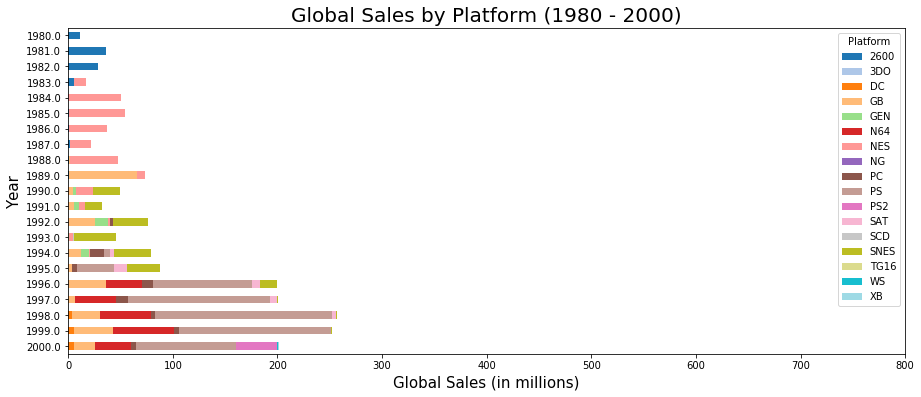

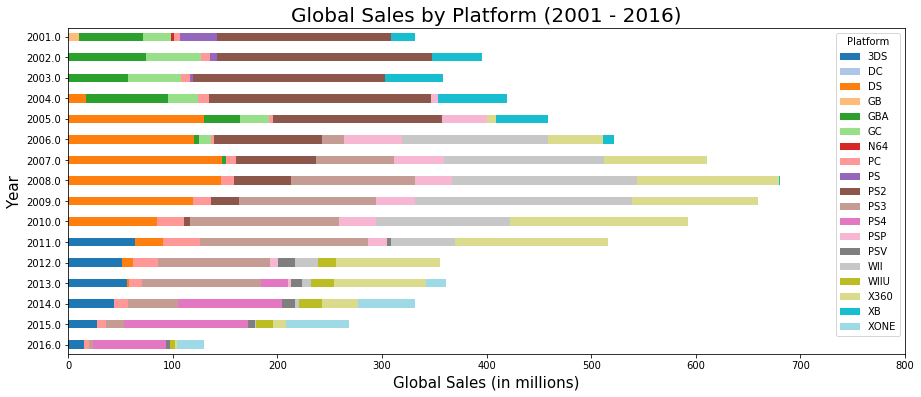

In [20]:
# Take out the data from columns we need for plotting the global sales by plarform
ratings16_pf = ratings16[['Platform', 'Year', 'Global_Sales']].set_index('Year')

# Group by year and platform to sum them up
ratings16_pf = ratings16_pf.groupby(['Platform', 'Year']).sum()

# Get the pivot table used for drawing horizontal stacked bar plot
pv_pf = pd.pivot_table(ratings16_pf, values = 'Global_Sales', index = 'Year', columns = 'Platform')

# Sort the values by year and break them into 2 parts (1980 - 2000) and (2001 - 2016) 
pv_pf = pv_pf.sort_values(by = 'Year', ascending = False)
pv_2000 = pv_pf.loc[pv_pf.index <= 2000]
pv_2016 = pv_pf.loc[pv_pf.index > 2000]

# Filter out plaforms that have neglibile amout of global sales
for pf in pv_2000.columns:
    if pv_2000[pf].sum() < 0.1:
        pv_2000 = pv_2000.drop(columns = [pf])

for pf in pv_2016.columns:
    if pv_2016[pf].sum() < 1:
        pv_2016 = pv_2016.drop(columns = [pf])  
        
# Draw the horizontal bar plots & Set titles and labels for them
plt_2000 = pv_2000.plot.barh(stacked = True, figsize = (15, 6), colormap = 'tab20', xlim = (0, 800))#, title = "Global Sales by Platform (1980 - 2000)")
plt_2000.set_title("Global Sales by Platform (1980 - 2000)", fontsize = 20)
plt_2000.set_xlabel("Global Sales (in millions)", fontsize = 15)
plt_2000.set_ylabel("Year", fontsize = 15)

plt_2016 = pv_2016.plot.barh(stacked = True, figsize = (15, 6), colormap = 'tab20', width = 0.4, xlim = (0, 800))#, title = "Global Sales by Platform (1980 - 2000)")
plt_2016.set_title("Global Sales by Platform (2001 - 2016)", fontsize = 20)
plt_2016.set_xlabel("Global Sales (in millions)", fontsize = 15)
_=plt_2016.set_ylabel("Year", fontsize = 15)

#### Conclusion for 8.2
- Compared with the popularity of game genre, the popularity of platform shifted more regularly. We can clearly see that the       oldder platforms are replaced by newer platforms more regularly, which means that the duration of the populairy of certain       platform cannot last long except the plaform has its successor.  
- We can see certain trends for popular game platforms from 1980 - 2016. 
    - In 1980s, the dominated platform changed from 2600 to NES.
    - In 1990s, the variance of game plaform started to increase. PS quickly led the leading position once it was published. 
    - In 2000s and 2010s, platforms such as DS, PS family, and XBOX family dominate. 

### 8.3 Critic/ User Scores discrepency by Genre
- Now we shift our focus from global sales to scores for each Genre
- We aim to explore whether there are some diffenrences bewteen Critic/ User scores by Genre

In [21]:
# Get the scores related data set from ratings16
score_ra16 = ratings16[['Genre', 'Critic_Score', 'User_Score']]

# Drop the NaN rows before we proceed
score_ra16 = score_ra16.dropna()

# Standardize score units
def standardize_score_unit(score):
    score = score * 10
    return score
score_ra16['User_Score'] = score_ra16['User_Score'].apply(standardize_score_unit)

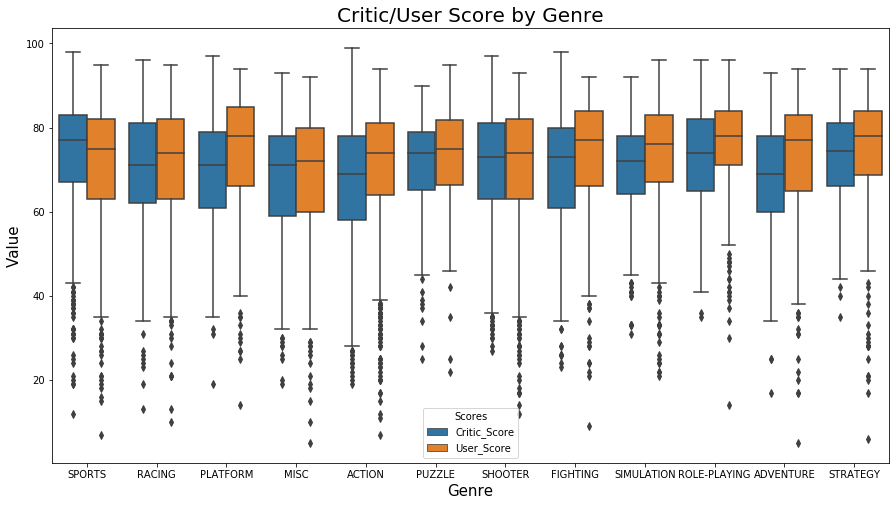

In [22]:
# Plot the boxplot & Set plot title and labels
plt.figure(figsize = (15, 8))
score_data = pd.melt(score_ra16, id_vars = ['Genre'], value_vars = ['Critic_Score','User_Score'], var_name = 'Scores')
score_box_plt = sns.boxplot(x = 'Genre',y = 'value', data = score_data, hue = 'Scores')
score_box_plt.set_title('Critic/User Score by Genre', fontsize = 20)
score_box_plt.set_ylabel("Value", fontsize = 15)
_ = score_box_plt.set_xlabel("Genre", fontsize = 15)

- Based on the bloxplot, we found that the Critic and User scores have similar average score, and they also tend to have similar spread (standard deviation) and normality.
- However, we would like to further explore the data by taking Hypothesis Test on the data we have.
    - We proceed by randomly choosing one of the genre for HT.
        - Here we choose scores under 'ACTION' for HT.

#### 8.3.1 Hypothesis Test for Score Difference under 'ACTION' Genre
- We proceed by taking following steps
    - Check the assumptions for running one-sample t-test on the score difference
        - Change study setting if assumptions not met (e.g. resample under random process, sample size)
    - Draw the data table for t-stat calculation
    - Set Hypothesis & run one-sample t-test
    - Calculate the P-value & Draw the conclusion

##### Step 1: Check whether assumptions are met
- CLT Balance Condition on differences
- Differences are independent (check via randomizaion and n < 10%)
  - Here we assume that our data set (action_sc) has roughly all the action games from 1980 - 2016

In [23]:
# Get only the Score data from "ACTION" genre
action_sc = score_ra16.loc[score_ra16['Genre'] == 'ACTION']

# Add a new column as score difference
action_sc['Diff_Score'] = action_sc['Critic_Score'] - action_sc['User_Score']

# Select a value for sample size between the interval that met assumptions
# The interval should be [30, action_sc.shape[0] * 0.1] 
# We select sample size = 70 here
n = 70

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


##### Step 2: Randomly select data & draw the data table

In [24]:
# Generate the indices for the rows we'll select randomly from the data set
# Reminder: Here we use seed so that the result is predictable
np.random.seed(1)
int_ind_list = [round(x) for x in list(action_sc.index)]
index_sc = np.random.choice(int_ind_list, n)

# Extract the sample data set & mean/ std info 
sample_sc = action_sc.loc[index_sc, :]
critic_sc_mean = np.mean(sample_sc['Critic_Score'])
user_sc_mean = np.mean(sample_sc['User_Score'])
diff_sc_mean = np.mean(sample_sc['Diff_Score'])
critic_sc_sd = np.std(sample_sc['Critic_Score'])
user_sc_sd = np.std(sample_sc['User_Score'])
diff_sc_sd = np.std(sample_sc['Diff_Score'])

# Create a new data frame
ht_data = pd.DataFrame(np.array([[critic_sc_mean, user_sc_mean, diff_sc_mean], [critic_sc_sd, user_sc_sd, diff_sc_sd], [n, n, n]]), columns = ['Critic_Score', 'User_Score', 'Diff_Score'], index = ['Mean', 'SD', 'n'])
ht_data

,Critic_Score,User_Score,Diff_Score
Mean,70.657143,74.057143,-3.400000
SD,11.098115,11.014128,11.541726
n,70.000000,70.000000,70.000000


##### Step 3: Set Hypothesis & Run One-sample t-test
- Null Hypothesis: There are no differences between Critic Score and User Score of "ACTION" games 
    - (i.e. the mean of differences from all pairs = 0)
- Alternative Hypothesis: There exist differences between Critic Score and User Score of "ACTION" games 
    - (i.e. the mean of differences from all pairs != 0)

In [25]:
# Assuming Null Hypothesis, we run the one-sample t-test.
# The t-stat lives on T69 distribution
t_stat = (diff_sc_mean - 0) / (diff_sc_sd / np.sqrt(n))
t_stat

-2.464661006676407

##### Step 4: Calculate the P-value & Draw the conclusion
   - We may find the bound for the P-value according to the t-table [1]
       - The t-table can be referenced here: [1] https://www.openintro.org/go/?id=stat_prob_tables_normal_t_chisq&referrer=/book/os/index.php
   - Since we have t_stat roughly equal to -2.05, the bound for the P-value indicated by the 
     t-table is between 0.02 and 0.05
   
     
#### Conclusion for this Hypothesis Test 
   - If we pick significance level = 0.05, then we may need to reject the null hypothesis, since 
     our P-value is betweeen 0.02 and 0.05 which is highly likely < 0.05
   - Thus, based on this particular t-test, it appears that the average Critic score and User score of 
     the "ACTION" games are different

##### We would like to explore the relationship between Critic_Score and User_Score more generally. Thus, we try to do a similar HT for all the games regardless their genre. This time, for simplicity, we ignore the steps for conducting HT.

#### 8.3.2 Hypothesis Test for Score Difference

In [26]:
# Get the data set
all_sc = score_ra16

# Add a new column as score difference
all_sc['Diff_Score'] = all_sc['Critic_Score'] - all_sc['User_Score']

# Select a value for sample size between the interval that met assumptions
# The interval should be [30, all_sc.shape[0] * 0.1] 
# We select sample size = 200 here
n1 = 200

# Generate the indices for the rows we'll select randomly from the data set
# Reminder: Here we use seed so that the result is predictable
np.random.seed(1)
ind_list = [round(x) for x in list(all_sc.index)]
ind_sc = np.random.choice(ind_list, n)

# Extract the sample data set & mean/ std info 
sample_sc1 = all_sc.loc[ind_sc, :]
critic_sc_mean1 = np.mean(sample_sc1['Critic_Score'])
user_sc_mean1 = np.mean(sample_sc1['User_Score'])
diff_sc_mean1 = np.mean(sample_sc1['Diff_Score'])
critic_sc_sd1 = np.std(sample_sc1['Critic_Score'])
user_sc_sd1 = np.std(sample_sc1['User_Score'])
diff_sc_sd1 = np.std(sample_sc1['Diff_Score'])

# Assuming Null Hypothesis, we run the one-sample t-test.
# The t-stat lives on T199 distribution
t_stat = (diff_sc_mean1 - 0) / (diff_sc_sd1 / np.sqrt(n1))
t_stat

-0.2948290564119359

#### Conclusion for this Hypothesis Test 
- If we pick significance level = 0.05, then we may need to reject the null hypothesis, since our P-value is less than 0.01
- Thus, based on this particular t-test, it appears that the avergae Critic score and User score are different
- However, we need to remind ourselves that the process to draw the samples are not truly random, so the test result may not be true

# 9. Model
After exporing the data, we fingured out that there are some relationship between the popularity and the information, such as name, publisher and platform, of a game. We wonder if we can predict the popularity, particularily, the sale and the scores, of a game, given the general information.

## 9.1 Setups

### 9.1.1 Standard of evaluating the accuracy
Since our goal is given a game's basic information, including name, publisher, developer, rating, release date, platform, and genre, to predict the number of sale, the critic score and the user score, which are all numeric within a cetain range, we want to use mean square error to evaluate the accuracy.

In [27]:
def MSE(pred, Y):
    return metrics.mean_squared_error(pred, Y)

#### 9.1.2 Track unique values of certain categories
To use linear regression, we will need to seperate column with $N$ labels into $N$ binary columns that only has value 0 or 1.
<br> We will implement that by making some maps that maps labels to column indexes.

In [28]:
ratings16_no_NAN = ratings16.dropna()

Platform_map = {v:i for i,v in enumerate(ratings16.Platform.unique())}
Genre_map = {v:i for i,v in enumerate(ratings16.Genre.unique())}
Rating_map = {v:i for i,v in enumerate(ratings16.Rating.unique())}
Year_map = {v:i for i,v in enumerate(ratings16.Year.unique())}

Platform_map[np.NaN]=len(Platform_map)
Genre_map[np.NaN]=len(Genre_map)
Rating_map[np.NaN]=len(Rating_map)
Year_map[np.NaN]=len(Year_map)

#### 9.1.3 TF-IDF model construction
Since we also want to interpret influence by the games' names, we want to train a tf-idf model first.

In [29]:
Name_tfidf = TfidfVectorizer(sublinear_tf=True, analyzer='word', tokenizer=word_tokenize)
_ = Name_tfidf.fit(ratings16.Name.to_list())

## 9.2 Model builded with dataset with no NaN values

#### 9.2.1 shuffle data

In [30]:
shuffled = shuffle(ratings16_no_NAN)

shuffledX = shuffled[['Name', 'Platform', 'Genre', 'Publisher', 'Rating', 'Year', 'Developer']]
shuffledY = shuffled[['Global_Sales', 'Critic_Score', 'User_Score']]

idx_train = len(shuffled) * 8 // 10
idx_test = len(shuffled) * 9 // 10

trainX = shuffledX[:idx_train]
testX = shuffledX[idx_train:idx_test]
validX = shuffledX[idx_test:]

trainY = shuffledY[:idx_train]
testY = shuffledY[idx_train:idx_test]
validY = shuffledY[idx_test:]

In [31]:
# check if successfully shuffled
print(shuffled.shape, trainX.shape, testY.shape)

(6960, 14) (5568, 7) (696, 3)


In [32]:
del shuffled, shuffledX, shuffledY

##### 9.2.2  Model 1.0: Naive Model
Simply uses average value of y as prediction; Used as baseline to test the improvement in accuracy of our models.

In [33]:
sale, c_s, u_s = trainY.mean()
pred_sale_1_0 = [sale] * len(validX)
pred_CS_1_0 = [c_s] * len(validX)
pred_US_1_0 = [u_s] * len(validX)

mse_sale_1_0 = MSE(pred_sale_1_0, validY.Global_Sales)
mse_CS_1_0 = MSE(pred_CS_1_0, validY.Critic_Score)
mse_US_1_0 = MSE(pred_US_1_0, validY.User_Score)

In [34]:
print(mse_sale_1_0, mse_CS_1_0, mse_US_1_0)

1.871759551891479 181.42878593115213 2.1475352189543697


#### 9.2.3 Model 1.1: Linear model: Predict with Rating, Platform, Genre and Year
Using Platform, Rating, Genre, and Year to constuct a Linear regression model,
<br>then predict the u value using the model.

In [35]:
def convertX(Platform, Rating, Genre, Year):
    P = [0]*len(Platform_map)
    R = [0]*len(Rating_map)
    G = [0]*len(Genre_map)
    Y = [0]*len(Year_map)
    P[Platform_map[Platform]] = 1
    P[Rating_map[Rating]] = 1
    G[Genre_map[Genre]] = 1
    Y[Year_map[Year]] = 1
    return P + R + G + Y

In [36]:
trainCX = trainX.apply(lambda row: convertX(row.Platform, row.Rating, row.Genre, row.Year), axis=1).to_list()
validCX = validX.apply(lambda row: convertX(row.Platform, row.Rating, row.Genre, row.Year), axis=1).to_list()

In [37]:
clf = linear_model.LinearRegression(1.0)
clf.fit(trainCX, trainY.Global_Sales.to_list())
pred = clf.predict(validCX)
mse_sale_1_1 = MSE(pred, validY.Global_Sales)

In [38]:
clf = linear_model.LinearRegression(1)
clf.fit(trainCX, trainY.Critic_Score.to_list())
pred = clf.predict(validCX)
mse_CS_1_1 = MSE(pred, validY.Critic_Score)

In [39]:
clf = linear_model.LinearRegression(1)
clf.fit(trainCX, trainY.User_Score.to_list())
pred = clf.predict(validCX)
mse_US_1_1 = MSE(pred, validY.User_Score)

In [40]:
print(mse_sale_1_1, mse_CS_1_1, mse_US_1_1)
print(mse_sale_1_1/mse_sale_1_0, mse_CS_1_1/mse_CS_1_0, mse_US_1_1/mse_US_1_0)

1.7779950517062484 172.03725985823007 1.9845754899649783
0.9499056916309159 0.9482357442633942 0.92411778510029


We see that the is MSE is reduced by about 5% - 10% percent.

#### 9.2.4   Model 1.2: TF-IDF using Game's Name
We assume a game's name is also important, that it can potentially effect the sales and ratings of it.
We use tf-idf to the transform the names of the game, then trained a linear model to predict.

In [41]:
trainCX = Name_tfidf.transform(trainX.Name)
validCX = Name_tfidf.transform(validX.Name)

In [42]:
clf = linear_model.Ridge(1.0)
clf.fit(trainCX, trainY.Global_Sales.to_list())
pred = clf.predict(validCX)
mse_sale_1_2 = MSE(pred, validY.Global_Sales)

In [43]:
clf = linear_model.Ridge(1.0)
clf.fit(trainCX, trainY.Critic_Score.to_list())
pred = clf.predict(validCX)
mse_CS_1_2 = MSE(pred, validY.Critic_Score)

In [44]:
clf = linear_model.Ridge(1.0)
clf.fit(trainCX, trainY.User_Score.to_list())
pred = clf.predict(validCX)
mse_US_1_2 = MSE(pred, validY.User_Score)

In [45]:
print(mse_sale_1_2, mse_CS_1_2, mse_US_1_2)
print(mse_sale_1_2/mse_sale_1_0, mse_CS_1_2/mse_CS_1_0, mse_US_1_2/mse_US_1_0)

1.5505511636954616 120.58423374853666 1.8087138864234817
0.8283922804767178 0.6646367230517404 0.8422278109618806


We see that the is MSE is reduced by about 20% - 40% percent.
<br>This is quite suprising since we are just using the name as the unput.
<br>Some of the bias can be caused by some game series have some specific names.

#### 9.2.5   Model 1.3: Predict upon the averge of developer / publisher

In [46]:
def train_local_mean(X, Y):
    degree = len(X[0])
    X_map = [defaultdict(list) for _ in range(degree)]

    for x, y in zip(X, Y):
        for i,xx in enumerate(x):
            X_map[i][xx].append(y)
        
    X_mean_map = [{k : sum(v)/len(v) for k, v in x.items()} for x in X_map]
    Ymean = sum(Y)/len(Y)
    
    model = linear_model.LinearRegression(1.0)
    model.fit([[ X_mean_map[i][xx] if xx in X_mean_map[i] else Ymean for i, xx in enumerate(x)] for x in X], Y)
    
    return model, X_mean_map, Ymean

def evaluate_local_mean(mod, X):
    model, X_mean_map, Ymean = mod
    return model.predict([[ X_mean_map[i][xx] if xx in X_mean_map[i] else Ymean for i, xx in enumerate(x)] for x in X])

In [47]:
mod = train_local_mean(list(zip(trainX.Publisher, trainX.Developer)), trainY.Global_Sales)
pred = evaluate_local_mean(mod, list(zip(validX.Publisher, validX.Developer)))
mse_sale_1_3 = MSE(pred, validY.Global_Sales)

In [48]:
mod = train_local_mean(list(zip(trainX.Publisher, trainX.Developer)), trainY.Critic_Score)
pred = evaluate_local_mean(mod, list(zip(validX.Publisher, validX.Developer)))
mse_CS_1_3 = MSE(pred, validY.Critic_Score)

In [49]:
mod = train_local_mean(list(zip(trainX.Publisher, trainX.Developer)), trainY.User_Score)
pred = evaluate_local_mean(mod, list(zip(validX.Publisher, validX.Developer)))
mse_US_1_3 = MSE(pred, validY.User_Score)

In [50]:
print(mse_sale_1_3, mse_CS_1_3, mse_US_1_3)
print(mse_sale_1_3/mse_sale_1_0, mse_CS_1_3/mse_CS_1_0, mse_US_1_3/mse_US_1_0)

1.5584532563852571 126.85069214721008 1.9148136782544403
0.8326140260966668 0.6991762166966541 0.8916331901586969


We see that the is MSE is reduced by about 10% - 30% percent. 
<br>This is also a goog improvment, although not as good as ti-idf.

### 9.3 Analysis on model outputs
We want to visualize how much our model helped predict the game sales and scores.

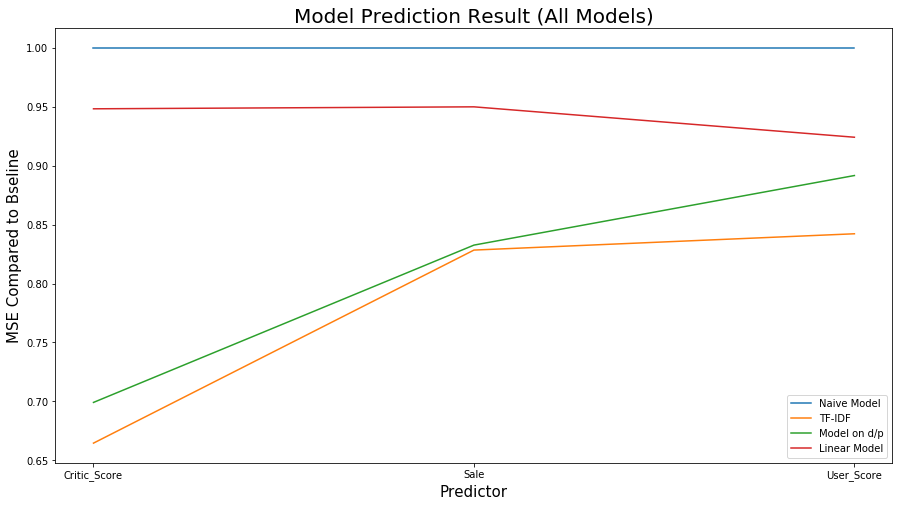

In [51]:
# Configure the data frame for the model output data
model_out_data = pd.DataFrame(np.array([['Naive Model', 'Sale', mse_sale_1_0/mse_sale_1_0], ['Naive Model', 'Critic_Score', mse_CS_1_0/mse_CS_1_0], ['Naive Model', 'User_Score', mse_US_1_0/mse_US_1_0],
                                        ['Linear Model', 'Sale', mse_sale_1_1/mse_sale_1_0], ['Linear Model', 'Critic_Score', mse_CS_1_1/mse_CS_1_0], ['Linear Model', 'User_Score', mse_US_1_1/mse_US_1_0],
                                        ['TF-IDF', 'Sale', mse_sale_1_2/mse_sale_1_0], ['TF-IDF', 'Critic_Score', mse_CS_1_2/mse_CS_1_0], ['TF-IDF', 'User_Score', mse_US_1_2/mse_US_1_0],
                                        ['Model on d/p', 'Sale', mse_sale_1_3/mse_sale_1_0], ['Model on d/p', 'Critic_Score', mse_CS_1_3/mse_CS_1_0], ['Model on d/p', 'User_Score', mse_US_1_3/mse_US_1_0]]), columns = ['Model', 'Mse_Type', 'Values'])
model_group_data = model_out_data.set_index('Model').groupby(['Model', 'Mse_Type']).sum()

# Helper function used to conver object to float
def convert_val_to_float(value):
    value = float(value)
    return value
model_group_data['Values'] = model_group_data['Values'].apply(convert_val_to_float) 

# Helpler function used to plot single model mse
def plot_model_mse(model):
    data = model_group_data.loc[model]
    plt.plot(data.index, data.values)
    
# Set the related label & title for plots 
plt.figure(figsize = (15, 8))
plt.title('Model Prediction Result (All Models)', fontsize = 20)            
plt.xlabel('Predictor', fontsize = 15)
plt.ylabel('MSE Compared to Bseline', fontsize = 15)

# Plot all the models' mse plot
models = ['Naive Model', 'TF-IDF', 'Model on d/p', 'Linear Model']
for model in models:
    plot_model_mse(model)
_ = plt.legend(models)

This plot visualizes the differences of the results predicted by different models we trained. We may clealy see that the TF-IDF Model predicts the outcomes most precisely while the Linear Model does the worst, although it is still relatively more precise than the Naive Model. We do accomplish the goal of predicting critic/ user scores and sales based on other factors. We believe, at least to some extent, these models may benefit gaming campanies to make better decision for their games.

# 10. Ethics & Privacy
The datasets we use contain only public information and don’t include any personal information, as they are mostly general information of game, and some statistics about them. All the data can be searched on public webpages and our data analysis does not involve any beneficial use. The research question we raised does not involve any ethical concerns. It’s just an analysis and forecast based on personal interests and future market trends.
<br>Also, the information in the datasets does not contain any personal information of the players of the game. While as the datasets are not complete (they don’t have the data of every single game), some bias may be applied to them, and we should be caution and point out the potential bias when we analyze the data. Meanwhile, not every player would give reviews for each game on the certain website. So the user ratings may involve slight sampling errors.


# 11. Conclusion 
We firstly parse the data to remove/rename unnecessary columns and drop some NaNs rows for the main two datasets we are analyzing. Then, by making visualizations for the game genres of the games, we have a general understanding of the distribution of popular game genres and game released platforms in each time period. Then, we try to compare whether the critic score and user score have a similarity and correlation. Based on the boxplot, we found that the Critic and User scores have similar average scores, and they also tend to have similar spread (standard deviation) and normality. Later, to have a more reliable conclusion, we run a  t-test for the critic score and user score for “action games”. It appears that the average Critic score and User score of the "ACTION" games are different. The same conclusion also applies for all the games regardless of their genres.
 
To make our analysis better help game developers predict their sales and ratings, we trained several models to make predictions. This includes a linear model which can predict based on Rating, Platform, Genre and Year,TF-IDF model using Game's Name and a model which can predict upon the average of developer / publisher. Although these models are still relatively basic and may have possible and potential biases due to some incomplete statistics of the dataset, they can still help game developers predict their likely response when the game is not released yet. This can also help them decide on different marketing strategies and corresponding funding arrangements.
